In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,Input
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.utils import to_categorical

C:\Users\peaks\AppData\Local\Temp\ipykernel_32788\1397311752.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_train = pd.read_csv('train.csv') #import data
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head() # check training data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head() # check test data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df_train['label'] # store label column's values into y
y_train=to_categorical(y,num_classes=10) # put into categorical form (10 classes)
df_train = df_train.drop(columns=['label']) # drop label column from train set


In [6]:
X_tng = np.array(df_train).reshape(df_train.shape[0],28,28,1)/255  #Normalization for pixel values from 0-255 to 0-1
X_test = np.array(df_test).reshape(df_test.shape[0],28,28,1)/255

In [7]:
y_train #check y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
y_train.shape

(42000, 10)

In [9]:
X_tng.shape #check input shape


(42000, 28, 28, 1)

In [10]:
X_test.shape

(28000, 28, 28, 1)

In [37]:
from keras.callbacks import EarlyStopping

Building model with Conv
 - input_shape from 784, -> (28,28,1)

In [58]:
callback = EarlyStopping(monitor='loss',restore_best_weights=True)
nn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)),
    Conv2D(filters=32,kernel_size=3,activation='relu',kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)),
    Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.25),
    Flatten(),
    Dense(units=256, activation="relu"),
    Dropout(0.5),
    Dense(units=10, activation="softmax")
])

nn_model.compile(loss='categorical_crossentropy',
optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [59]:
nn_model.summary() #show layer information

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_36 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 12, 12, 64)        36928     
                                                     

In [57]:
history = nn_model.fit(X_tng,y_train, epochs=30, validation_split=0.2,callbacks=[callback]) #train model

Epoch 1/30
1050/1050 [==============================] - 12s 11ms/step - loss: 0.2113 - accuracy: 0.9364 - val_loss: 0.0685 - val_accuracy: 0.9793
Epoch 2/30
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0811 - accuracy: 0.9765 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 3/30
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0631 - accuracy: 0.9815 - val_loss: 0.0418 - val_accuracy: 0.9879
Epoch 4/30
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0521 - accuracy: 0.9854 - val_loss: 0.0398 - val_accuracy: 0.9902
Epoch 5/30
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0480 - accuracy: 0.9867 - val_loss: 0.0358 - val_accuracy: 0.9912
Epoch 6/30
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0444 - accuracy: 0.9874 - val_loss: 0.0515 - val_accuracy: 0.9890
Epoch 7/30
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0399 - accuracy: 0.9886 - val_loss: 0.0337 -

In [60]:
hist = pd.DataFrame(history.history)    #show final loss and accuracy
hist['epoch'] = history.epoch
hist.tail(1)

,loss,accuracy,val_loss,val_accuracy,epoch
12,0.03301,0.991131,0.040105,0.991429,12


In [61]:
import matplotlib.pyplot as plt #import graphing method

In [62]:
def plot_graphs(history, metric): # plit loss and accuracy of train and valid set
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.2203445566818118)

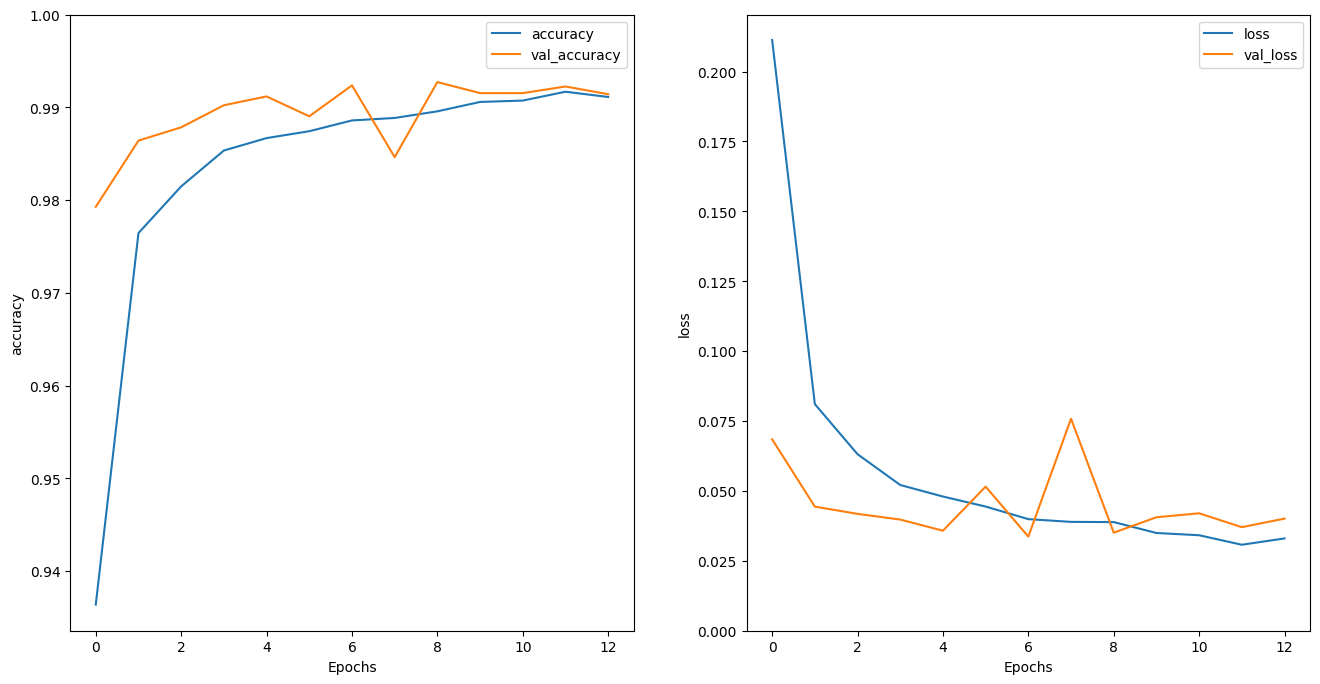

In [63]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [64]:
prediction = nn_model.predict(X_test)

875/875 [==============================] - 4s 4ms/step


In [65]:
prediction.shape 

(28000, 10)

In [66]:
Y_predict = np.argmax(prediction, axis=1)

In [67]:
Y_predict

array([3, 6, 3, ..., 3, 3, 3], dtype=int64)

In [68]:
result = pd.DataFrame([i for i in range(1,len(Y_predict)+1)],columns=['ImageId'])

In [69]:
result['Label'] = Y_predict

In [70]:
result

,ImageId,Label
0,1,3
1,2,6
2,3,3
3,4,3
4,5,3
...,...,...
27995,27996,3
27996,27997,6
27997,27998,3
27998,27999,3


In [72]:
result.to_csv('submission.csv', index=False)
result.to_csv(r'C:\Users\peaks\Desktop\Submission\submission.csv', index=False)